In [1]:
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import xgboost as xgb

pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# df_raw = pd.read_csv(r"C:\Users\rados\OneDrive - SGH\Semestr 8\data_science_w_biz_2\projekt_churn_bank\BankChurners.csv")
df_raw = pd.read_csv(r"BankChurners.csv")
df = df_raw.copy()

<h1>Dataset description</h1>

<b>CLIENTNUM</b> - Client number. Unique identifier for the customer holding the account

<b>Attrition_Flag</b> - Internal event (customer activity) variable - if the account is closed then 1 else 0

<b>Customer_Age</b> - Demographic variable - Customer's Age in Years

<b>Gender</b> - Demographic variable - M=Male, F=Female

<b>Dependent_count</b> - Demographic variable - Number of dependents

<b>Education_Level</b> - Demographic variable

<b>Marital_Status</b> - Demographic variable

<b>Income_Category</b> - Demographic variable - Annual Income Category of the account holder

<b>Card_Category</b> - Product Variable - Type of Card

<b>Months_on_book</b> - Period of relationship with bank

<b>Total_Relationship_Count</b> - Total no. of products held by the customer

<b>Months_Inactive_12_mon</b> - No. of months inactive in the last 12 months

<b>Contacts_Count_12_mon</b> - No. of Contacts in the last 12 months

<b>Credit_Limit</b> - Credit Limit on the Credit Card

<b>Total_Revolving_Bal</b> - Total Revolving Balance on the Credit Card

<b>Total_Trans_Amt</b> - Total Transaction Amount (Last 12 months)

<b>Total_Trans_Ct</b> - Total Transaction Count (Last 12 months)

<b>Avg_Utilization_Ratio</b> - Average Card Utilization Ratio

<b>Total_Ct_Chng_Q4_Q1</b> - Change in Transaction Count (Q4 over Q1)

In [4]:
print(df_raw.columns)
# df.Dependent_count.unique()

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'],axis= 1,inplace=True)

In [7]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [8]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
# Udział kategorii w zmiennych
object_columns = df.select_dtypes(include=['object']).columns

for column in object_columns:
    print("Value counts for column:", column)
    value_counts = df[column].value_counts()
    value_counts_norm = df[column].value_counts(normalize=True)
    result_df = pd.concat([value_counts, value_counts_norm], axis=1)
    result_df.columns = ['Counts', 'Percentage']
    print(result_df)
    print()

Value counts for column: Attrition_Flag
                   Counts  Percentage
Attrition_Flag                       
Existing Customer    8500     0.83934
Attrited Customer    1627     0.16066

Value counts for column: Gender
        Counts  Percentage
Gender                    
F         5358    0.529081
M         4769    0.470919

Value counts for column: Education_Level
                 Counts  Percentage
Education_Level                    
Graduate           3128    0.308877
High School        2013    0.198776
Unknown            1519    0.149995
Uneducated         1487    0.146835
College            1013    0.100030
Post-Graduate       516    0.050953
Doctorate           451    0.044534

Value counts for column: Marital_Status
                Counts  Percentage
Marital_Status                    
Married           4687    0.462822
Single            3943    0.389355
Unknown            749    0.073961
Divorced           748    0.073862

Value counts for column: Income_Category
        

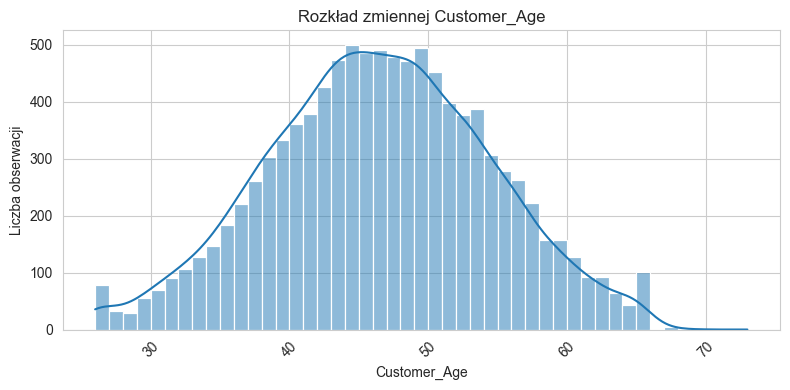

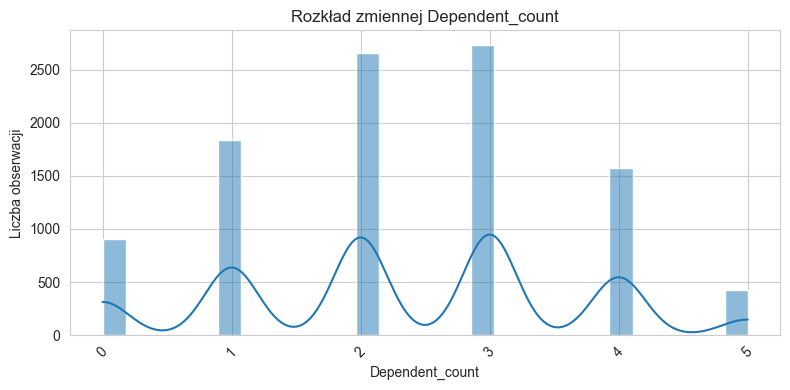

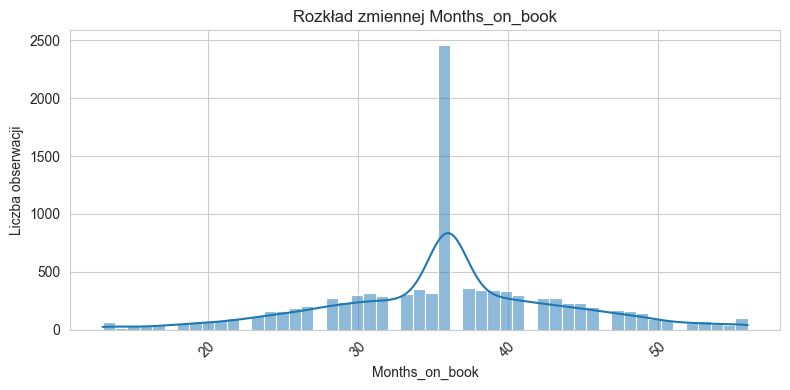

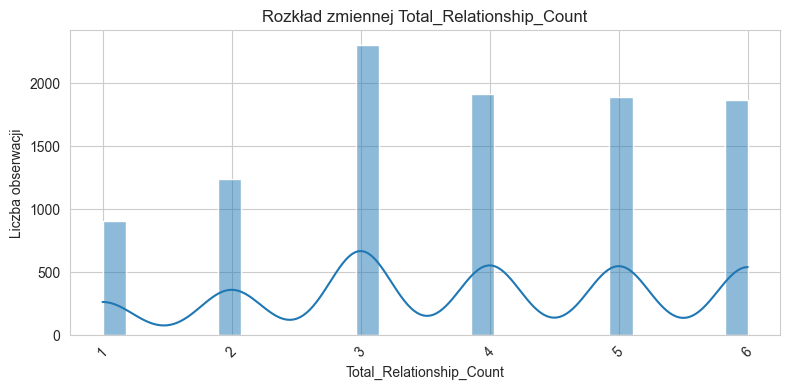

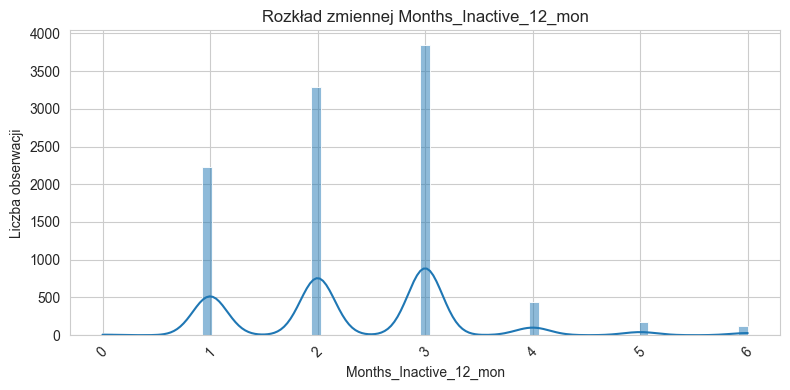

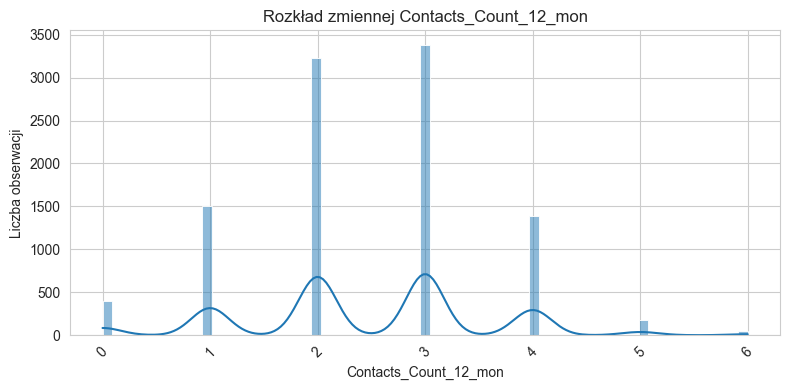

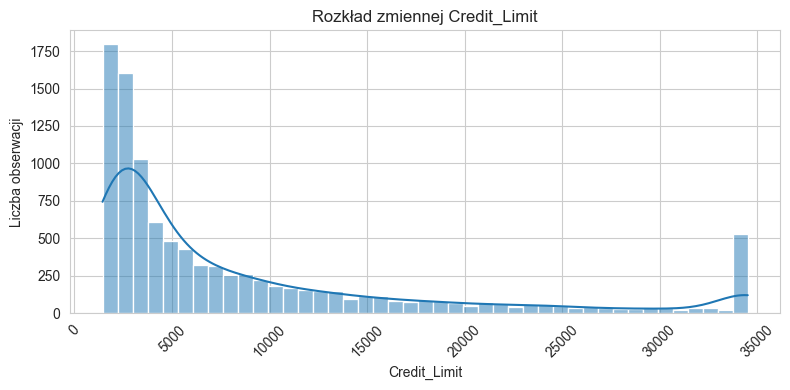

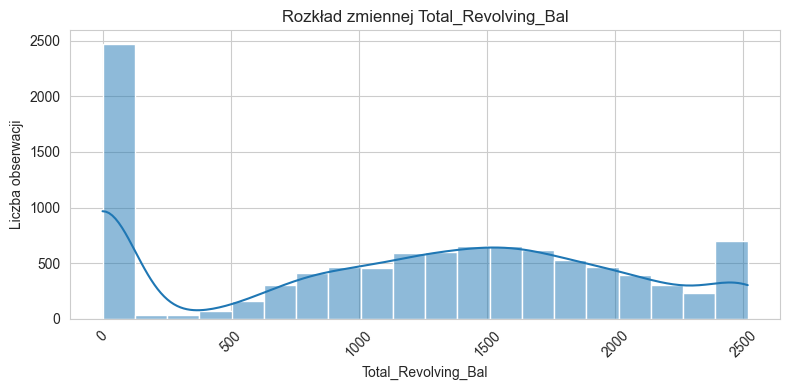

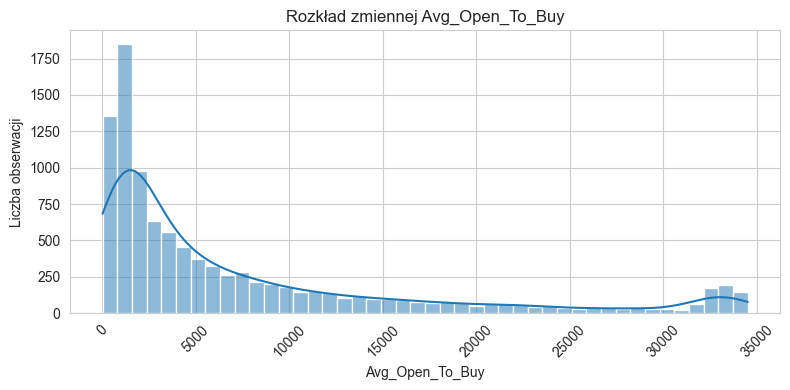

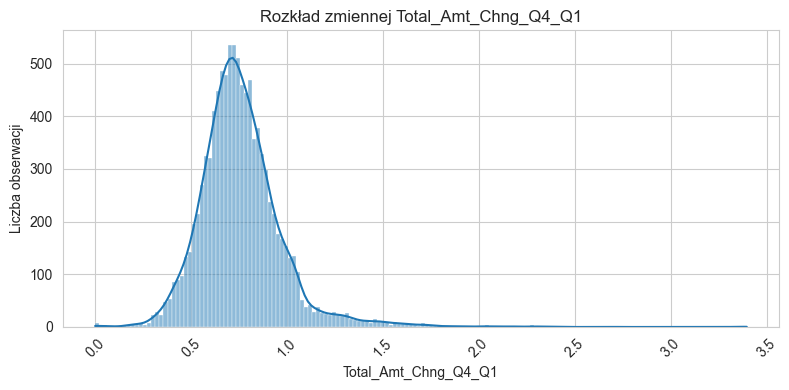

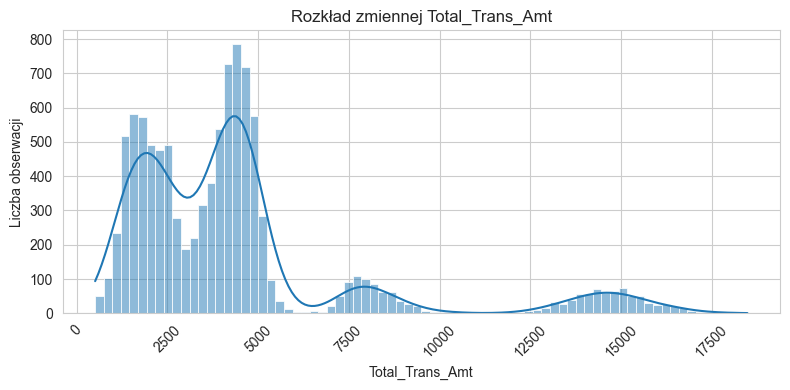

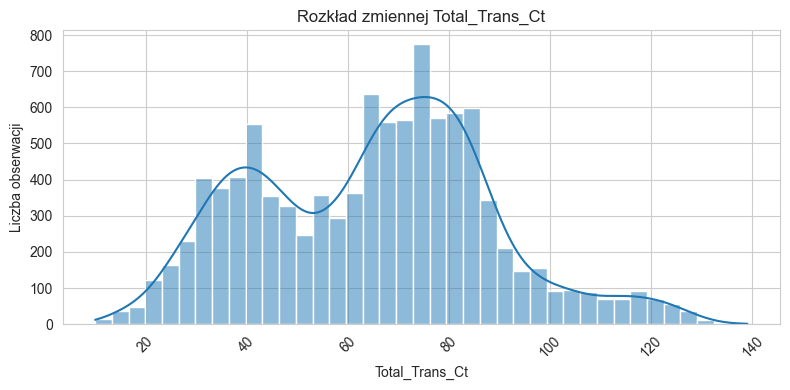

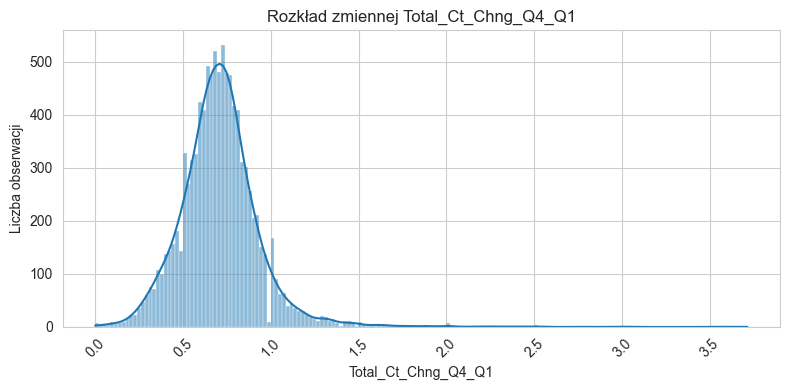

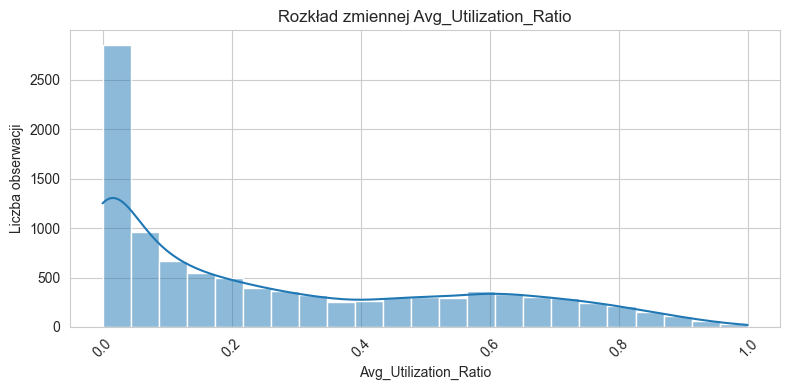

In [10]:
# Wykresy zmiennych ciągłych 
sns.set_style("whitegrid")
for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and col!="CLIENTNUM":
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True) 
        plt.title(f'Rozkład zmiennej {col}')  
        plt.xlabel(col)  
        plt.ylabel('Liczba obserwacji') 
        plt.xticks(rotation=45) 
        plt.tight_layout()  
        plt.show() 

In [165]:
# Sprawdzenie duplikatów
df.duplicated().sum()

0

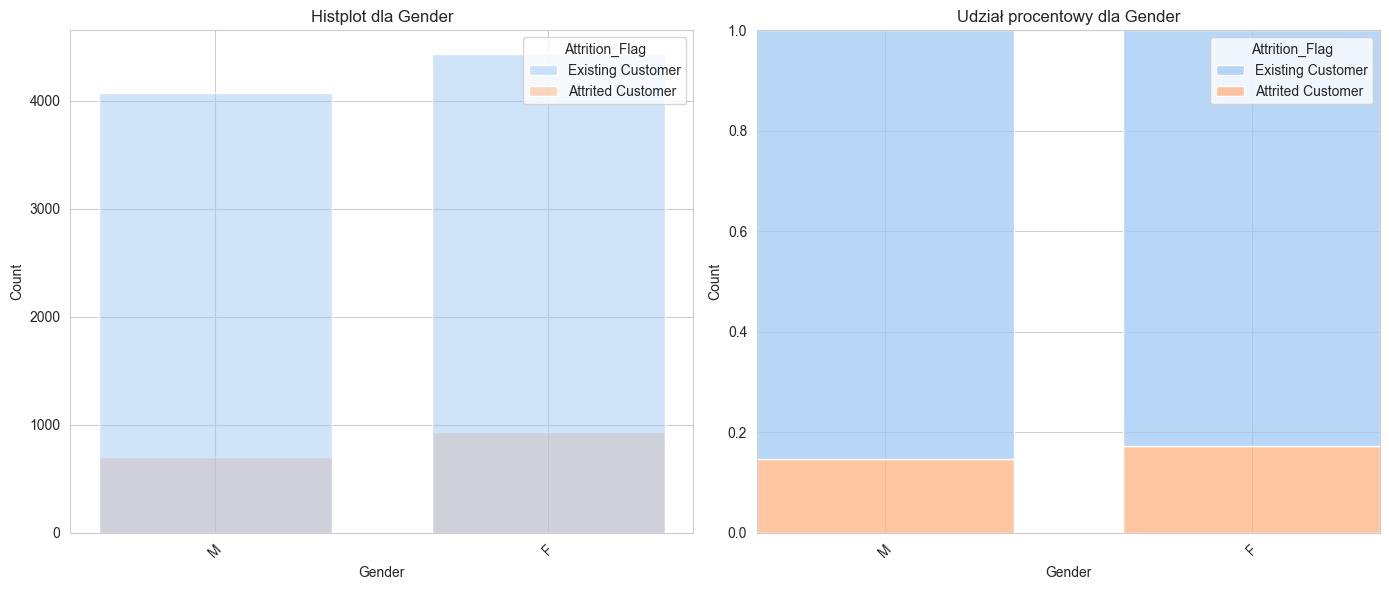

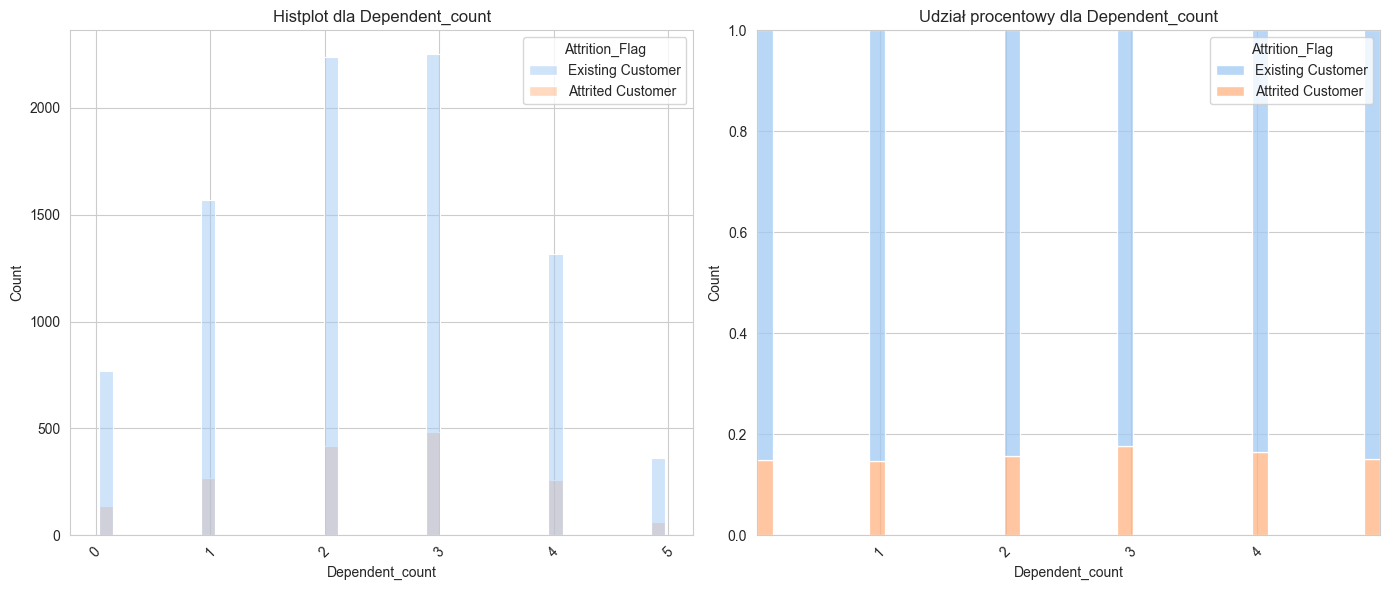

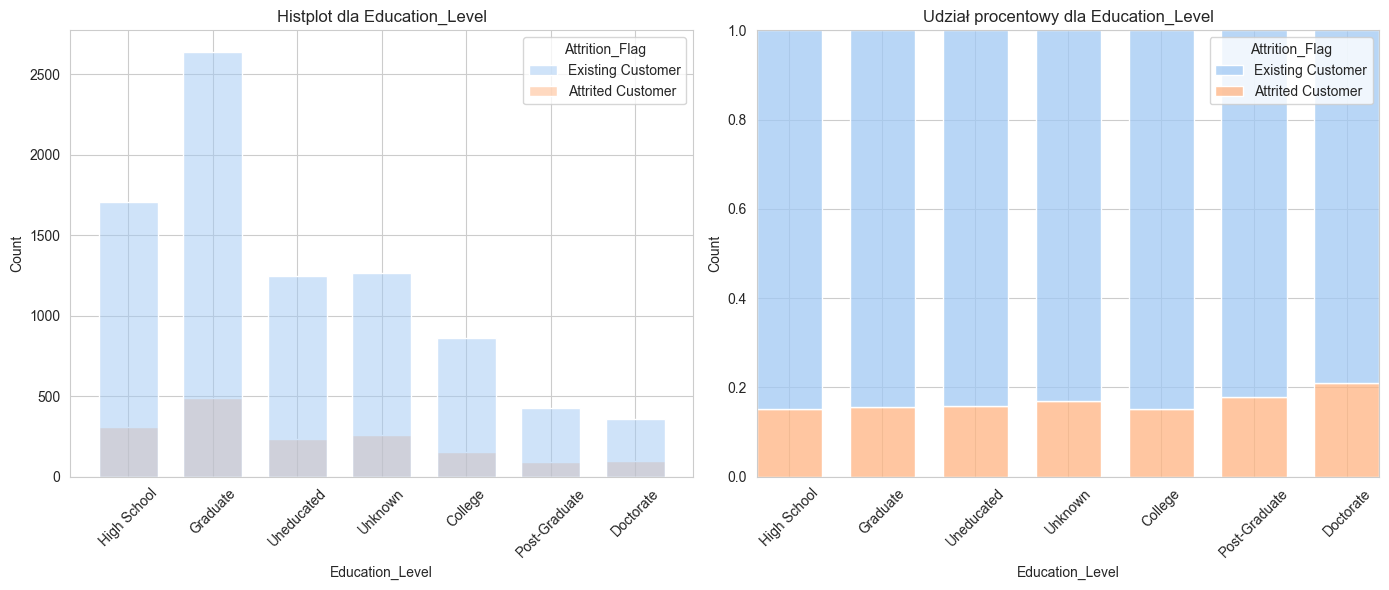

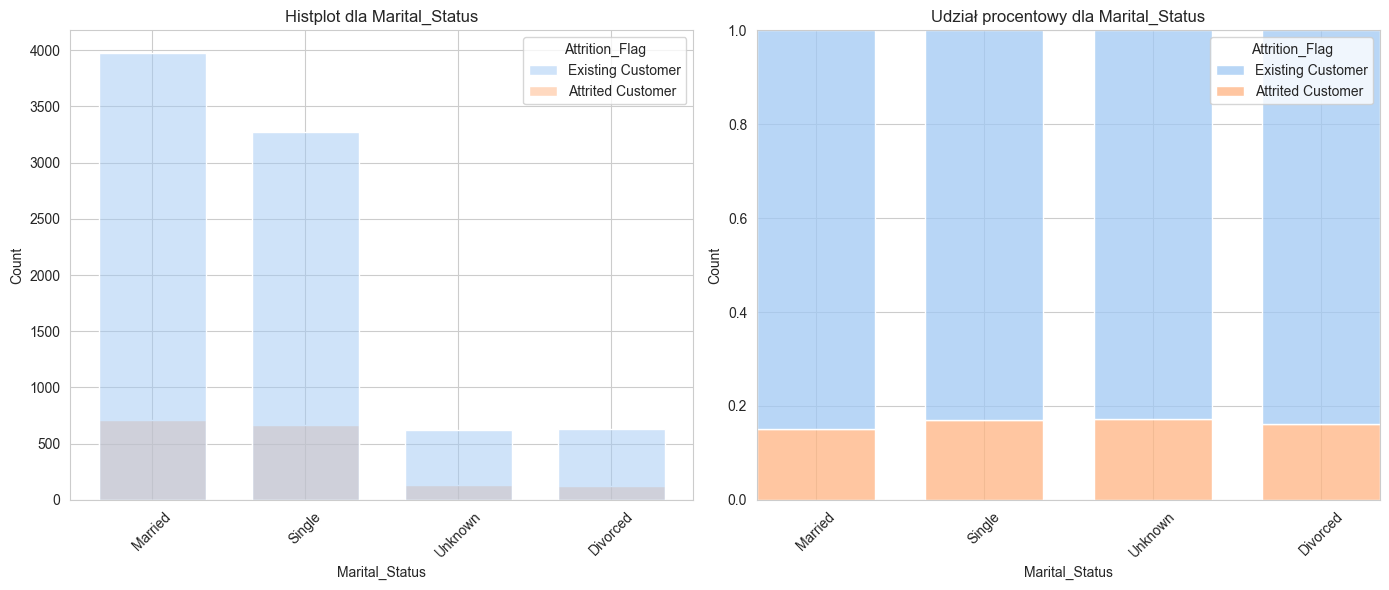

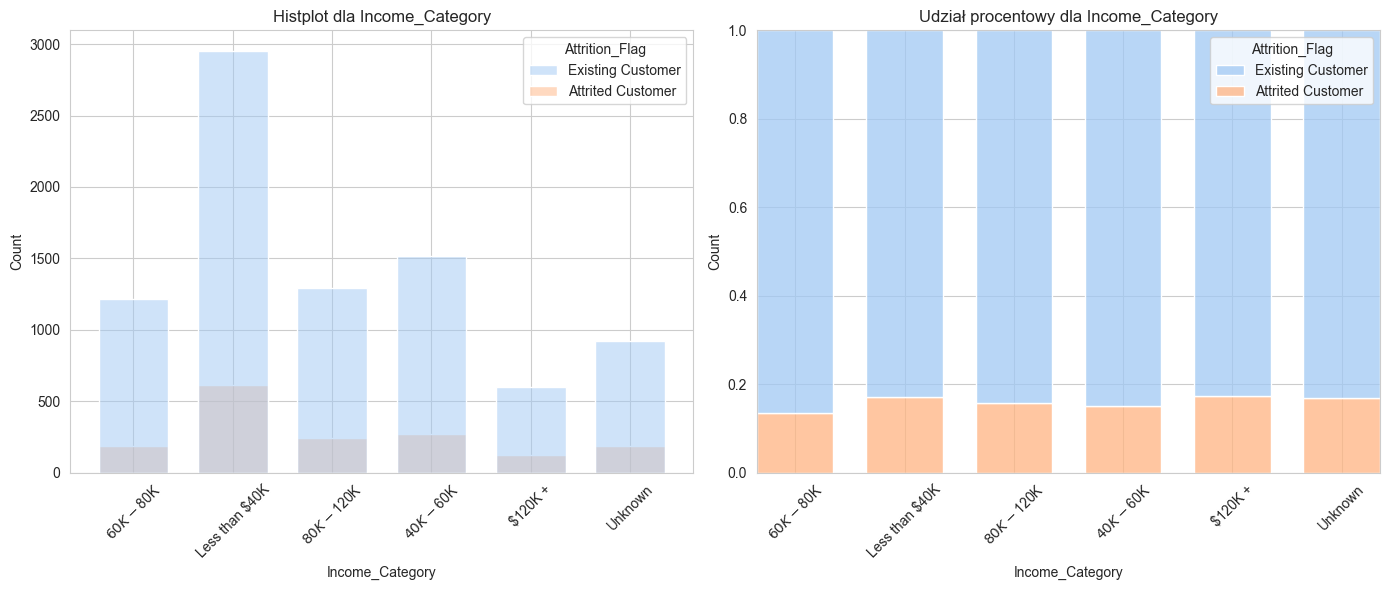

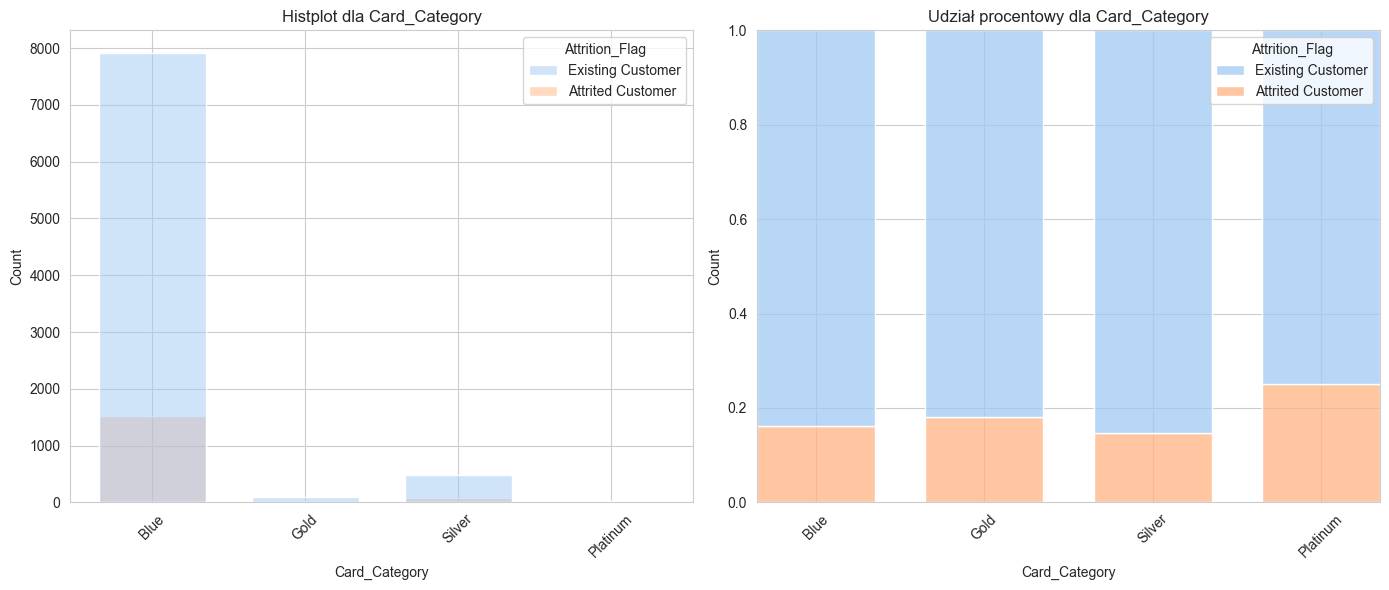

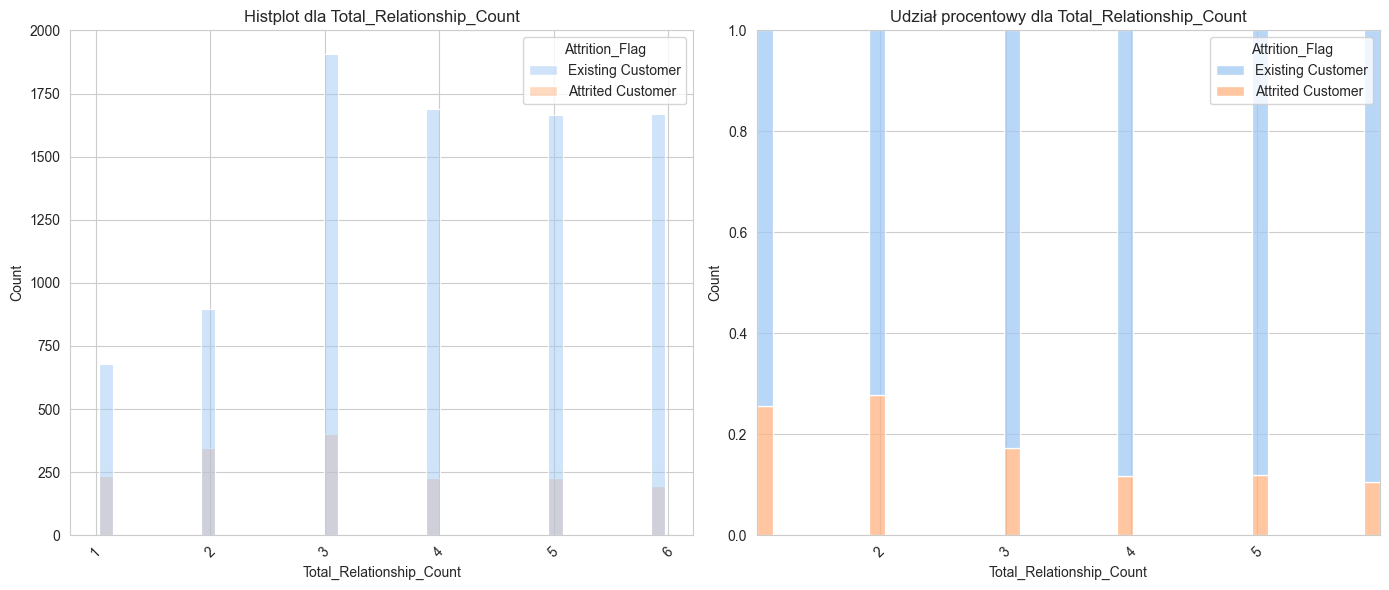

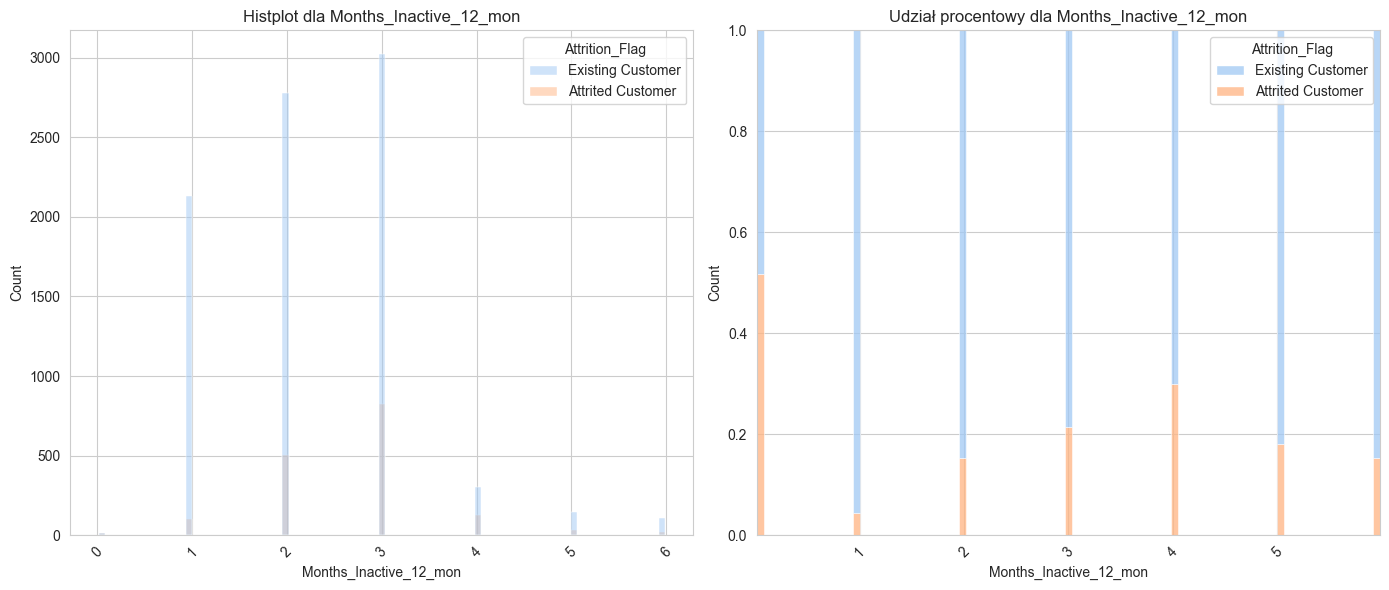

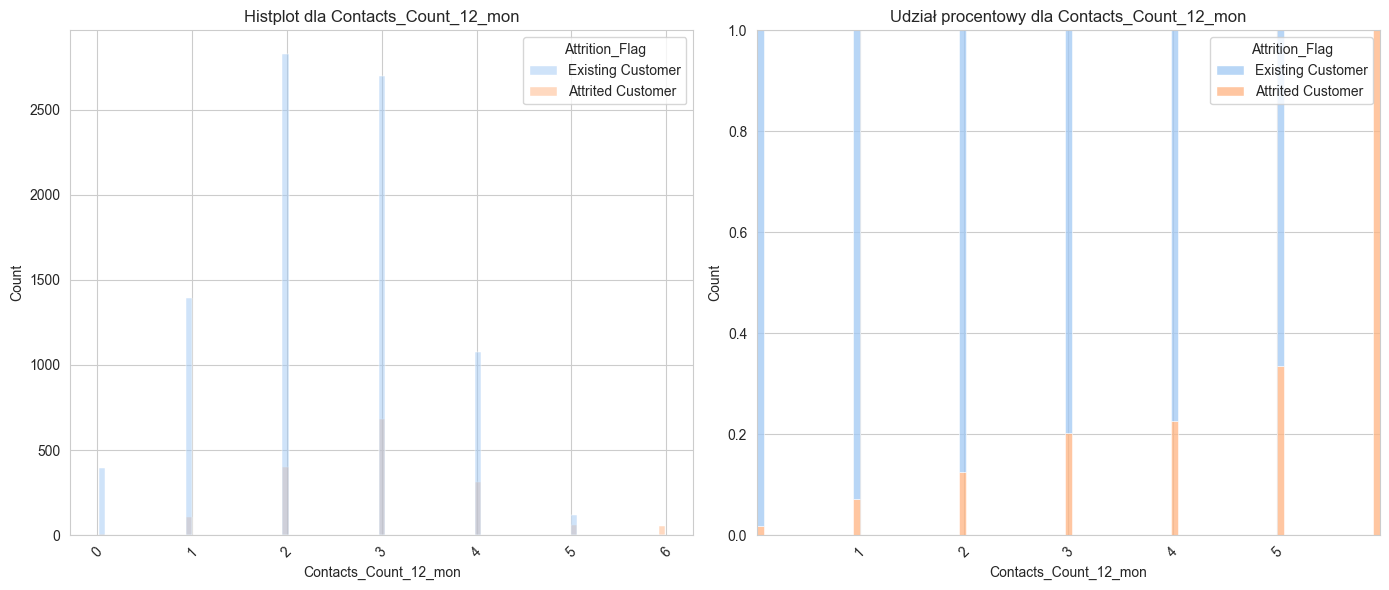

In [11]:
# Wykresy zmiennych kategorycznych
for col in df.columns.tolist():
    if (col != "Attrition_Flag" and df[col].dtype == 'object') or (df[col].dtype in ['int64', 'float64'] and df[col].nunique()<=8):
        
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        
        sns.histplot(df, hue="Attrition_Flag", x=col, shrink=.7, multiple="layer", palette="pastel", ax=axes[0])
        axes[0].set_title(f'Histplot dla {col}')
        axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45) 
        
        sns.histplot(df, hue="Attrition_Flag", x=col, shrink=.7, multiple="fill", palette="pastel", ax=axes[1])
        axes[1].set_title(f'Udział procentowy dla {col}')
        axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
        
        plt.tight_layout() 
        plt.show()

## Tranform data - convert category column to binary columns

In [12]:
# How OneHotEncoder works?
# your initial dataframe
df_ex = pd.DataFrame({
    'color': ['blue', 'green', 'red', 'blue', 'green', 'green']
})

# create the OneHotEncoder
enc = OneHotEncoder(sparse_output=False)
le = LabelEncoder()

# fit and transform the color column
color_transformed = enc.fit_transform(df_ex[['color']])
print(le.fit_transform(df_ex[['color']]))

# get feature names
feature_names = enc.get_feature_names_out(['color'])

# create a new dataframe with the transformed columns
df_transformed = pd.DataFrame(color_transformed, columns=feature_names)

print(df_transformed)

[0 1 2 0 1 1]
   color_blue  color_green  color_red
0         1.0          0.0        0.0
1         0.0          1.0        0.0
2         0.0          0.0        1.0
3         1.0          0.0        0.0
4         0.0          1.0        0.0
5         0.0          1.0        0.0


In [13]:
for column in df.select_dtypes(include = ["object"]).columns:
    [print(column, x) for x in df[column].unique()]

Attrition_Flag Existing Customer
Attrition_Flag Attrited Customer
Gender M
Gender F
Education_Level High School
Education_Level Graduate
Education_Level Uneducated
Education_Level Unknown
Education_Level College
Education_Level Post-Graduate
Education_Level Doctorate
Marital_Status Married
Marital_Status Single
Marital_Status Unknown
Marital_Status Divorced
Income_Category $60K - $80K
Income_Category Less than $40K
Income_Category $80K - $120K
Income_Category $40K - $60K
Income_Category $120K +
Income_Category Unknown
Card_Category Blue
Card_Category Gold
Card_Category Silver
Card_Category Platinum


In [14]:
# df = df_temp.copy()
# df_temp = df.copy()
for column in df.select_dtypes(include = ["object"]).columns:
    df[column] = df[column].str.replace("-|\s\+|\$", "", regex = True)
    df[column] = df[column].str.replace("\s+", "_", regex = True)
    [print(column, x) for x in df[column].unique()]

Attrition_Flag Existing_Customer
Attrition_Flag Attrited_Customer
Gender M
Gender F
Education_Level High_School
Education_Level Graduate
Education_Level Uneducated
Education_Level Unknown
Education_Level College
Education_Level PostGraduate
Education_Level Doctorate
Marital_Status Married
Marital_Status Single
Marital_Status Unknown
Marital_Status Divorced
Income_Category 60K_80K
Income_Category Less_than_40K
Income_Category 80K_120K
Income_Category 40K_60K
Income_Category 120K
Income_Category Unknown
Card_Category Blue
Card_Category Gold
Card_Category Silver
Card_Category Platinum


In [15]:
df_temp = df.copy()
# df = df_temp.copy()
for column in df.select_dtypes(include = ["object"]).columns:
    if column in ["Attrition_Flag", "Gender"]:
        le = LabelEncoder()
        transormed = le.fit_transform(df[[column]])
        df.drop([column], axis = 1, inplace = True)
        df_transformed = pd.DataFrame(transormed, columns=[column])
        df = pd.concat([df, df_transformed.astype("Int64")], axis = 1)
        continue
    # create the OneHotEncoder
    enc = OneHotEncoder(sparse_output=False)

    # fit and transform the color column
    transormed = enc.fit_transform(df[[column]])

    # get feature names
    feature_names = enc.get_feature_names_out([column])

    # create a new dataframe with the transformed columns
    df_transformed = pd.DataFrame(transormed, columns=feature_names)
    df = pd.concat([df, df_transformed.astype("Int64")], axis = 1)
print(df.columns)

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag', 'Gender', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High_School', 'Education_Level_PostGraduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_120K', 'Income_Category_40K_60K',
       'Income_Category_60K_80K', 'Income_Category_80K_120K',
       'Income_Category_Less_than_40K', 'Income_Category_Unknown',
       '

In [16]:
df.drop(df.select_dtypes(include = ["object"]).columns, axis = 1, inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CLIENTNUM                      10127 non-null  int64  
 1   Customer_Age                   10127 non-null  int64  
 2   Dependent_count                10127 non-null  int64  
 3   Months_on_book                 10127 non-null  int64  
 4   Total_Relationship_Count       10127 non-null  int64  
 5   Months_Inactive_12_mon         10127 non-null  int64  
 6   Contacts_Count_12_mon          10127 non-null  int64  
 7   Credit_Limit                   10127 non-null  float64
 8   Total_Revolving_Bal            10127 non-null  int64  
 9   Avg_Open_To_Buy                10127 non-null  float64
 10  Total_Amt_Chng_Q4_Q1           10127 non-null  float64
 11  Total_Trans_Amt                10127 non-null  int64  
 12  Total_Trans_Ct                 10127 non-null 

### EDA - explore data a bit before modeling

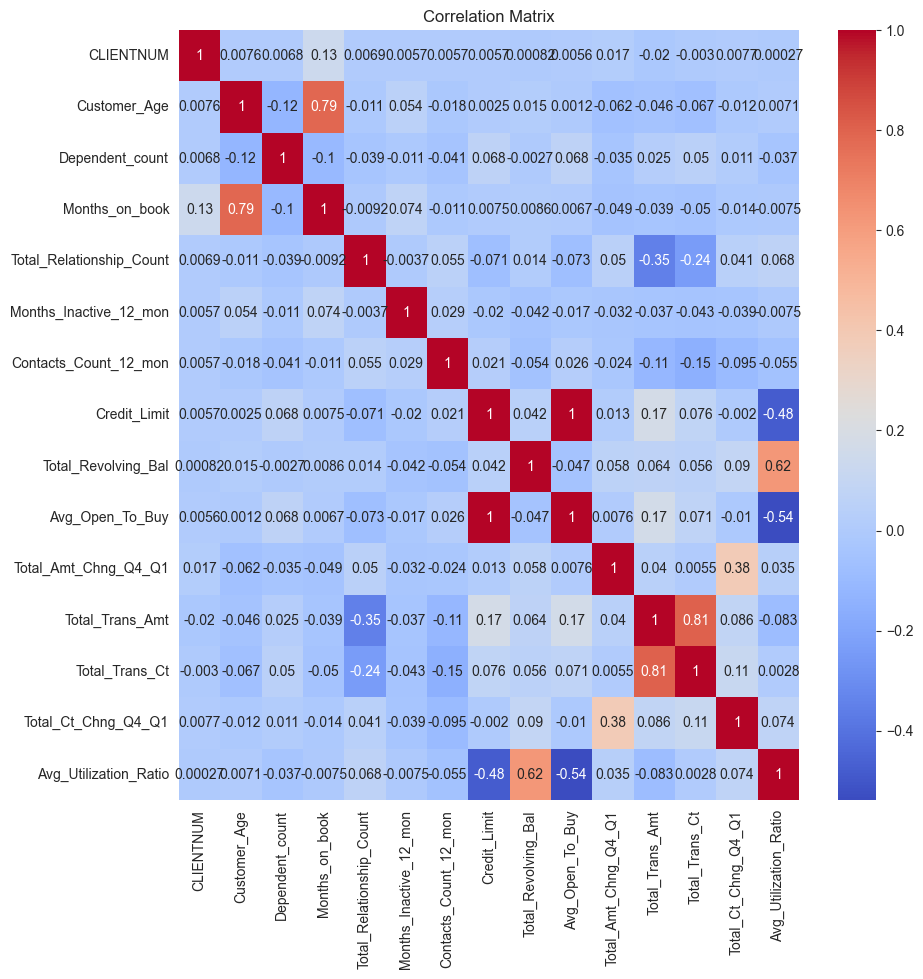

In [18]:
### let's chjeck correlation matrix
columns_for_corr = [col for col in df.columns if len(df[col].unique()) > 2]
# print(columns_for_corr)
df_corr = df[columns_for_corr].corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
# colinearity detected - remove columns which are unnecessary
columns_to_drop = []
columns_to_drop.append("Credit_Limit")
columns_to_drop.append("CLIENTNUM")

df.drop(columns_to_drop, axis = 1, inplace = True)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_Age                   10127 non-null  int64  
 1   Dependent_count                10127 non-null  int64  
 2   Months_on_book                 10127 non-null  int64  
 3   Total_Relationship_Count       10127 non-null  int64  
 4   Months_Inactive_12_mon         10127 non-null  int64  
 5   Contacts_Count_12_mon          10127 non-null  int64  
 6   Total_Revolving_Bal            10127 non-null  int64  
 7   Avg_Open_To_Buy                10127 non-null  float64
 8   Total_Amt_Chng_Q4_Q1           10127 non-null  float64
 9   Total_Trans_Amt                10127 non-null  int64  
 10  Total_Trans_Ct                 10127 non-null  int64  
 11  Total_Ct_Chng_Q4_Q1            10127 non-null  float64
 12  Avg_Utilization_Ratio          10127 non-null 

In [21]:
print(df["Attrition_Flag"].value_counts())
df['Attrition_Flag'] = df['Attrition_Flag'].replace({0: 1, 1: 0})
df["Attrition_Flag"].value_counts()

Attrition_Flag
1    8500
0    1627
Name: count, dtype: Int64


Attrition_Flag
0    8500
1    1627
Name: count, dtype: Int64

## Model

In [22]:
X = df.drop(["Attrition_Flag"], axis = 1)
y = df["Attrition_Flag"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42, test_size = 0.2, shuffle = True)

In [24]:
#Confirm the splitting is correct:
print("Shape of Training Data : ", "\nfeatures:", X_train.shape, ", target:", y_train.shape)
print("Target Label Distribution in train set : ", "\nChurn:", y_train.sum(), "Not Churn", len(y_train) - y_train.sum())
print("Percentage of Churn:", y_train.sum() / len(y_train) * 100)
print()
print("Shape of Test Data : ", "\nfeatures:", X_test.shape, ", target:", y_test.shape)
print("Target Label Distribution in test set : ", "\nChurn:", y_test.sum(), "Not Churn", len(y_test) - y_test.sum())
print("Percentage of Churn:", y_test.sum() / len(y_test) * 100)

Shape of Training Data :  
features: (8101, 35) , target: (8101,)
Target Label Distribution in train set :  
Churn: 1302 Not Churn 6799
Percentage of Churn: 16.07208986544871

Shape of Test Data :  
features: (2026, 35) , target: (2026,)
Target Label Distribution in test set :  
Churn: 325 Not Churn 1701
Percentage of Churn: 16.04146100691017


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_Age                   10127 non-null  int64  
 1   Dependent_count                10127 non-null  int64  
 2   Months_on_book                 10127 non-null  int64  
 3   Total_Relationship_Count       10127 non-null  int64  
 4   Months_Inactive_12_mon         10127 non-null  int64  
 5   Contacts_Count_12_mon          10127 non-null  int64  
 6   Total_Revolving_Bal            10127 non-null  int64  
 7   Avg_Open_To_Buy                10127 non-null  float64
 8   Total_Amt_Chng_Q4_Q1           10127 non-null  float64
 9   Total_Trans_Amt                10127 non-null  int64  
 10  Total_Trans_Ct                 10127 non-null  int64  
 11  Total_Ct_Chng_Q4_Q1            10127 non-null  float64
 12  Avg_Utilization_Ratio          10127 non-null 

In [26]:
list_of_models = {
    'logistic_regression' : LogisticRegression(random_state = 42, max_iter = 10000),
    'decision_tree' : DecisionTreeClassifier(max_depth = 5, random_state = 42),
    'Random_forest' : RandomForestClassifier(n_estimators = 150, max_depth = 4, random_state = 42),
    'GBDT' : GradientBoostingClassifier(n_estimators = 150, max_depth = 4, random_state = 42),
    "XGBoost" : xgb.XGBClassifier(n_estimators = 200, max_depth = 5, random_state = 42)
}


For Model: logistic_regression

For Training Set:

Macro F1 Score: 0.8051195670990361

Accuracy Score: 0.9055672139242069

Precision Score: 0.8484992269537461

Confusion Matrix:


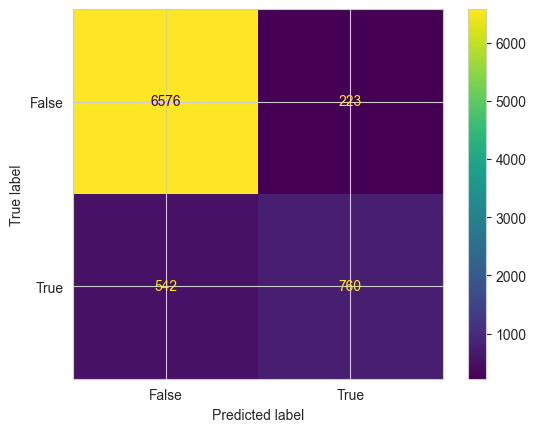

For Test Set:

Macro F1 Score: 0.7875229738850527

Accuracy Score: 0.9002961500493584

Precision Score: 0.8447455117527299

Confusion Matrix:


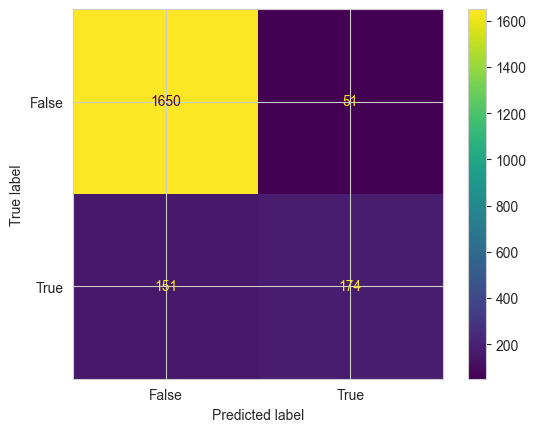


For Model: decision_tree

For Training Set:

Macro F1 Score: 0.8991770691331717

Accuracy Score: 0.9471670164177262

Precision Score: 0.9117133259215817

Confusion Matrix:


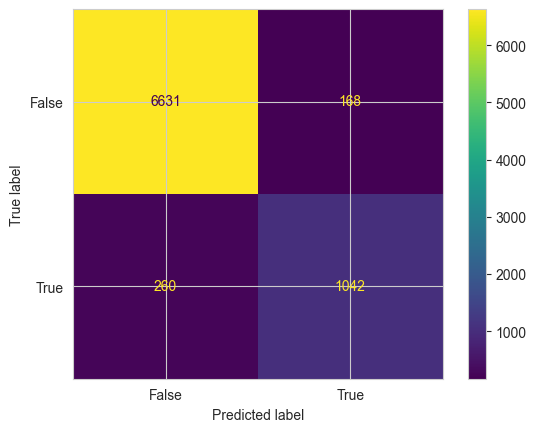

For Test Set:

Macro F1 Score: 0.8660544288547034

Accuracy Score: 0.9313919052319842

Precision Score: 0.8870126999437344

Confusion Matrix:


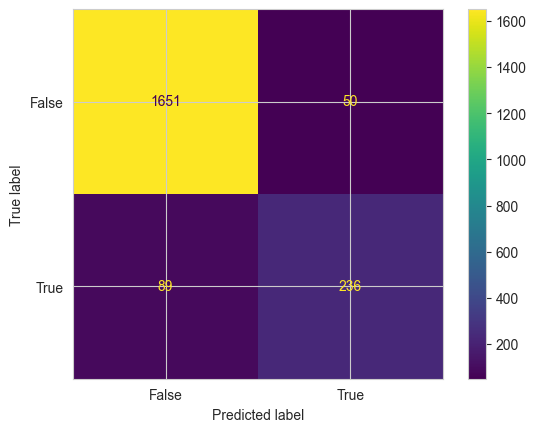


For Model: Random_forest

For Training Set:

Macro F1 Score: 0.7473181490992293

Accuracy Score: 0.8979138377978028

Precision Score: 0.9154812264146361

Confusion Matrix:


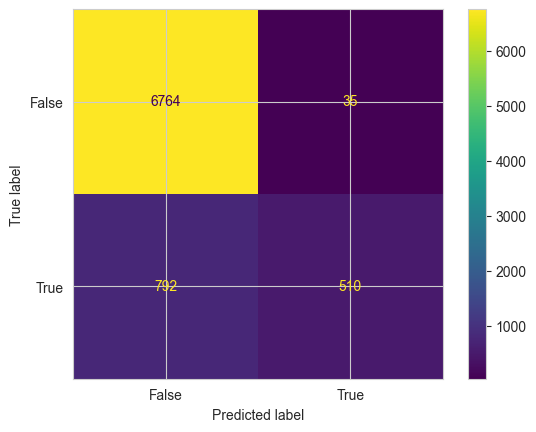

For Test Set:

Macro F1 Score: 0.7133016453012511

Accuracy Score: 0.8894373149062191

Precision Score: 0.916472759738908

Confusion Matrix:


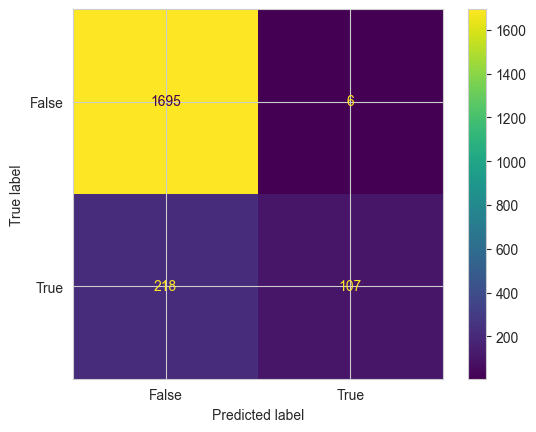


For Model: GBDT

For Training Set:

Macro F1 Score: 0.9824375377249663

Accuracy Score: 0.9906184421676336

Precision Score: 0.9873860135072049

Confusion Matrix:


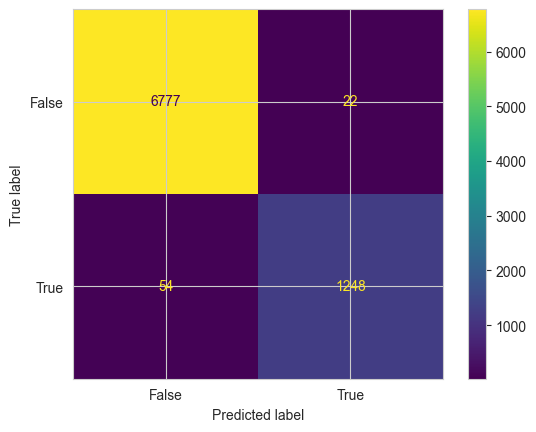

For Test Set:

Macro F1 Score: 0.9384100927192582

Accuracy Score: 0.9684106614017769

Precision Score: 0.9626883166063238

Confusion Matrix:


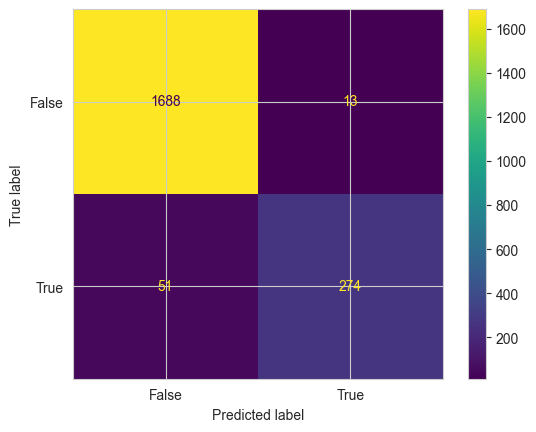


For Model: XGBoost

For Training Set:

Macro F1 Score: 1.0

Accuracy Score: 1.0

Precision Score: 1.0

Confusion Matrix:


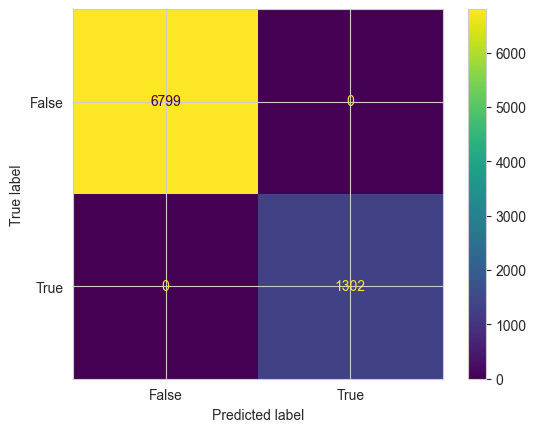

For Test Set:

Macro F1 Score: 0.9374887801813123

Accuracy Score: 0.9674234945705824

Precision Score: 0.9532372916477043

Confusion Matrix:


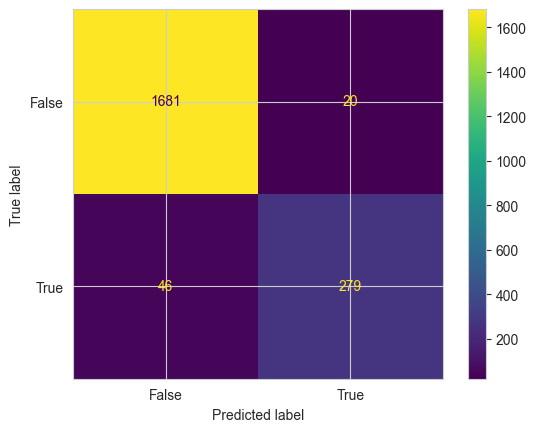

In [27]:
f1_train_scores = [] 
f1_test_scores = [] 
recall_test_scores = []
accuracy_train_scores = []
accuracy_test_scores = []
precision_train_scores = []
precision_test_scores = []

model_names = ['logistic_regression', 'decision_tree', 'Random_forest', 'GBDT', "XGBoost"]

for model in model_names:
    print("\nFor Model:", model)
    
    list_of_models[model].fit(X_train, y_train)

    print("\nFor Training Set:")

    y_train_pred = list_of_models[model].predict(X_train)

    f1_train = f1_score(y_train, y_train_pred, average='macro')
    print("\nMacro F1 Score:", f1_train)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    print("\nAccuracy Score:", accuracy_train)

    precision_train = precision_score(y_train, y_train_pred, average='macro')
    print("\nPrecision Score:", precision_train)

    print("\nConfusion Matrix:") 
    confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
    cm_display.plot()
    plt.show()

    print("For Test Set:")

    y_test_pred = list_of_models[model].predict(X_test)
    
    f1_test = f1_score(y_test, y_test_pred, average='macro')
    print("\nMacro F1 Score:", f1_test)

    accuracy_test = accuracy_score(y_test, y_test_pred)
    print("\nAccuracy Score:", accuracy_test)

    precision_test = precision_score(y_test, y_test_pred, average='macro')
    print("\nPrecision Score:", precision_test)

    recall_test_score = recall_score(y_test, y_test_pred, average='macro')
    
    print("\nConfusion Matrix:")
    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
    cm_display.plot()
    plt.show()
    
    f1_train_scores.append(f1_train)
    f1_test_scores.append(f1_test)
    recall_test_scores.append(recall_test_score)
    accuracy_train_scores.append(accuracy_train)
    accuracy_test_scores.append(accuracy_test)
    precision_train_scores.append(precision_train)
    precision_test_scores.append(precision_test)

In [28]:
summary = pd.DataFrame({'model_names' : model_names, 'f1_train_scores' : f1_train_scores, 'f1_test_scores' : f1_test_scores, 'accuracy_train_scores': accuracy_train_scores, 'accuracy_test_scores': accuracy_test_scores,'precision_train_scores': precision_train_scores, 'precision_test_scores': precision_test_scores, 'recall_test_scores' : recall_test_scores})
summary

,model_names,f1_train_scores,f1_test_scores,accuracy_train_scores,accuracy_test_scores,precision_train_scores,precision_test_scores,recall_test_scores
0,logistic_regression,0.805120,0.787523,0.905567,0.900296,0.848499,0.844746,0.752701
1,decision_tree,0.899177,0.866054,0.947167,0.931392,0.911713,0.887013,0.848380
2,Random_forest,0.747318,0.713302,0.897914,0.889437,0.915481,0.916473,0.662852
3,GBDT,0.982438,0.938410,0.990618,0.968411,0.987386,0.962688,0.917717
4,XGBoost,1.000000,0.937489,1.000000,0.967423,1.000000,0.953237,0.923352


<Axes: >

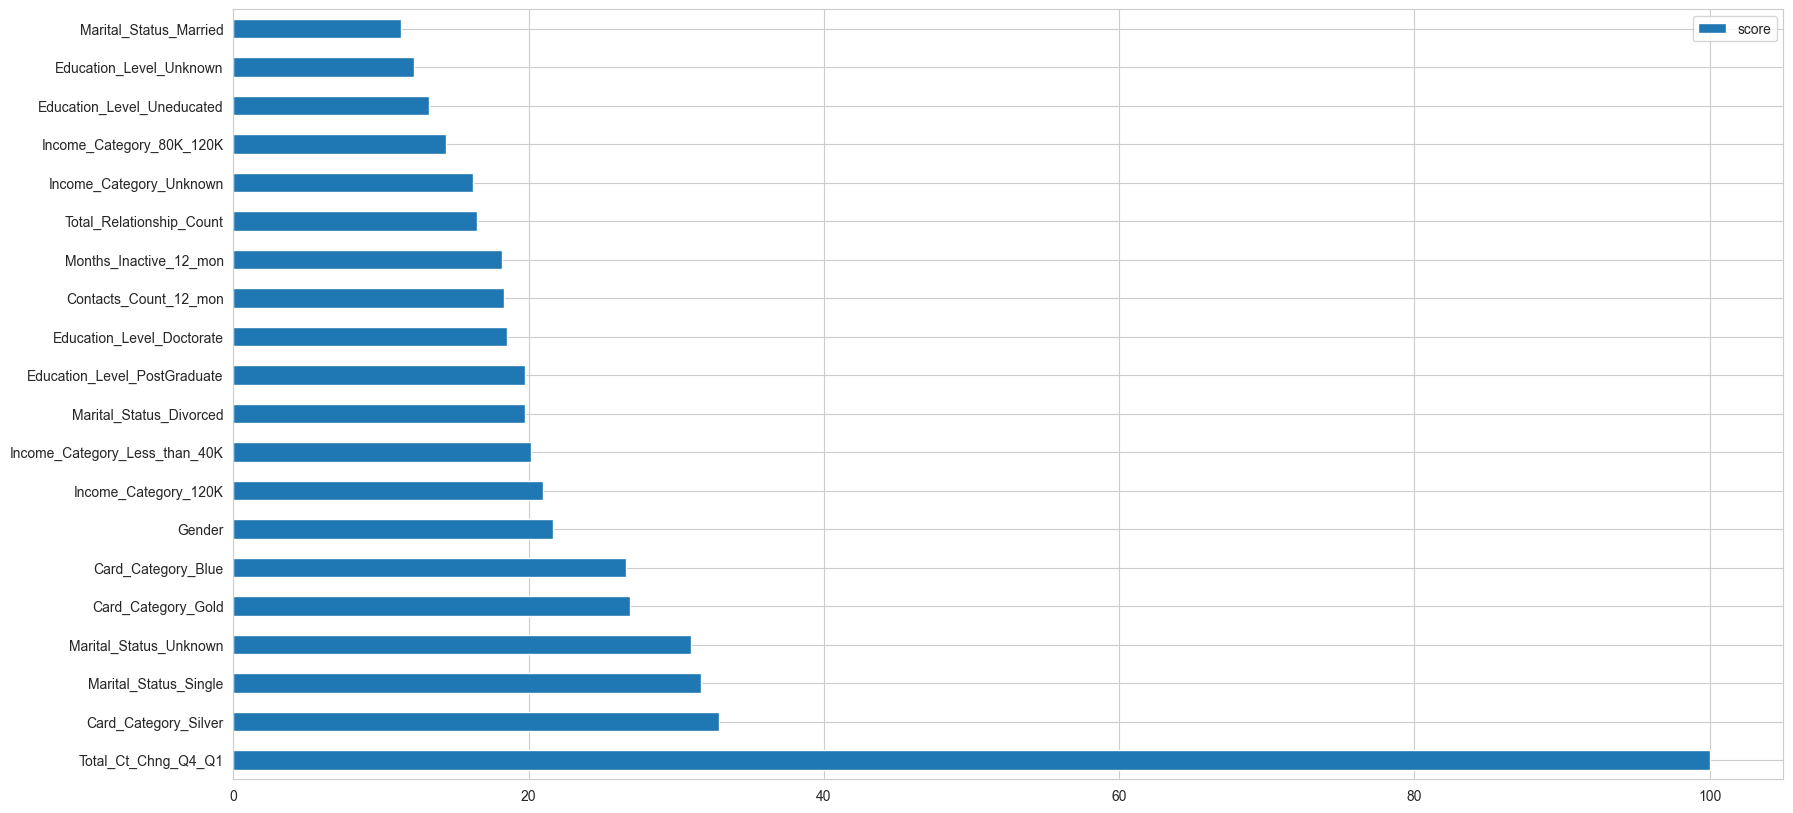

In [29]:
feature_importance = abs(list_of_models['logistic_regression'].coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())

data = pd.DataFrame(data=feature_importance, index=X.columns, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(20, columns="score").plot(kind='barh', figsize = (20,10))